In [1]:
!pip install kaggle

In [2]:
from google.colab import files

In [3]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rafiarandi","key":"98bdfd04e9da359f4d9f2acf3e971378"}'}

In [4]:
!ls

kaggle.json  sample_data


In [5]:
!ls -lha kaggle.json
!pip install -q kaggle # installing the kaggle package
!mkdir -p ~/.kaggle # creating .kaggle folder where the key should be placed
!cp kaggle.json ~/.kaggle/ # move the key to the folder
!pwd # checking the present working directory

-rw-r--r-- 1 root root 66 Jun  8 03:28 kaggle.json
/content


In [6]:
!chmod 600 ~/.kaggle/kaggle.json

In [7]:
!kaggle datasets list

ref                                                             title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
shreyanshverma27/online-sales-dataset-popular-marketplace-data  Online Sales Dataset - Popular Marketplace Data      7KB  2024-05-25 23:55:26           3785         73  1.0              
devarajv88/walmart-sales-dataset                                e-Commerce (Walmart) Sales Dataset                   5MB  2024-05-30 12:09:55           2326         35  1.0              
nuhmanpk/india-lok-sabha-election-results-2024                  Lok Sabha Election Results 2024 India               20KB  2024-06-05 05:49:01            832         23  1.0              
mayankanand2701/microsoft-stock-price-dataset                   M

In [8]:
! kaggle datasets download -d alinedobrovsky/plant-disease-classification-merged-dataset --force

Dataset URL: https://www.kaggle.com/datasets/alinedobrovsky/plant-disease-classification-merged-dataset
License(s): CC-BY-NC-SA-4.0
100% 17.3G/17.3G [01:36<00:00, 254MB/s]
100% 17.3G/17.3G [01:36<00:00, 193MB/s]


In [9]:
import zipfile

zip_path = '/content/plant-disease-classification-merged-dataset.zip'
extract_dir = '/content/data'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

In [10]:
import pandas as pd
import numpy as np
from numpy import random
import os
import time
import matplotlib
import matplotlib.pyplot as plt
import shutil
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Model
from tensorflow.keras.utils import img_to_array, load_img
from tensorflow.keras.utils import to_categorical

In [11]:
!ls '/content/data'

 Apple__black_rot			      Potato__early_blight
 Apple__healthy				      Potato__healthy
 Apple__rust				      Potato__late_blight
 Apple__scab				      Rice__brown_spot
 Cassava__bacterial_blight		      Rice__healthy
 Cassava__brown_streak_disease		      Rice__hispa
 Cassava__green_mottle			      Rice__leaf_blast
 Cassava__healthy			      Rice__neck_blast
 Cassava__mosaic_disease		      Soybean__bacterial_blight
 Cherry__healthy			      Soybean__caterpillar
 Cherry__powdery_mildew			      Soybean__diabrotica_speciosa
 Chili__healthy				      Soybean__downy_mildew
'Chili__leaf curl'			      Soybean__healthy
'Chili__leaf spot'			      Soybean__mosaic_virus
 Chili__whitefly			      Soybean__powdery_mildew
 Chili__yellowish			      Soybean__rust
 Coffee__cercospora_leaf_spot		      Soybean__southern_blight
 Coffee__healthy			      Strawberry__healthy
 Coffee__red_spider_mite		      Strawberry___leaf_scorch
 Coffee__rust				      Sugarcane__bacterial_blight
 Corn__common_rust			      Sugarc

In [12]:
data_path=r'/content/data'
classes=os.listdir(data_path)
filepaths=[]
labels=[]
for klass in classes:
    classpath=os.path.join(data_path, klass)
    flist=os.listdir(classpath)
#     if len(flist) > limiter:
#         flist=np.random.choice(flist, limiter, replace=False)
    for f in flist:
        fpath=os.path.join(classpath,f)
        filepaths.append(fpath)
        labels.append(klass)
Fseries=pd.Series(filepaths, name='filepaths')
Lseries=pd.Series(labels, name='labels')
df=pd.concat([Fseries, Lseries], axis=1)
num_of_classes=len(classes)
print(df['labels'].value_counts())


labels
Grape__black_rot                  11390
Soybean__healthy                   5998
Soybean__caterpillar               3309
Tomato__yellow_leaf_curl_virus     3214
Peach__bacterial_spot              2297
                                  ...  
Soybean__bacterial_blight            56
Coffee__cercospora_leaf_spot         55
Sugarcane__red_stripe                53
Soybean__downy_mildew                51
Soybean__mosaic_virus                22
Name: count, Length: 88, dtype: int64


In [13]:
# Create a dictionary with keys corresponding to unique labels sorted in alphabetical order
sorted_labels = sorted(df['labels'].unique())
classes = {i: label for i, label in enumerate(sorted_labels)}

# Display the dictionary
print(classes)

{0: 'Apple__black_rot', 1: 'Apple__healthy', 2: 'Apple__rust', 3: 'Apple__scab', 4: 'Cassava__bacterial_blight', 5: 'Cassava__brown_streak_disease', 6: 'Cassava__green_mottle', 7: 'Cassava__healthy', 8: 'Cassava__mosaic_disease', 9: 'Cherry__healthy', 10: 'Cherry__powdery_mildew', 11: 'Chili__healthy', 12: 'Chili__leaf curl', 13: 'Chili__leaf spot', 14: 'Chili__whitefly', 15: 'Chili__yellowish', 16: 'Coffee__cercospora_leaf_spot', 17: 'Coffee__healthy', 18: 'Coffee__red_spider_mite', 19: 'Coffee__rust', 20: 'Corn__common_rust', 21: 'Corn__gray_leaf_spot', 22: 'Corn__healthy', 23: 'Corn__northern_leaf_blight', 24: 'Cucumber__diseased', 25: 'Cucumber__healthy', 26: 'Gauva__diseased', 27: 'Gauva__healthy', 28: 'Grape__black_measles', 29: 'Grape__black_rot', 30: 'Grape__healthy', 31: 'Grape__leaf_blight_(isariopsis_leaf_spot)', 32: 'Jamun__diseased', 33: 'Jamun__healthy', 34: 'Lemon__diseased', 35: 'Lemon__healthy', 36: 'Mango__diseased', 37: 'Mango__healthy', 38: 'Peach__bacterial_spot', 

In [14]:
train_df, dummy_df=train_test_split(df, train_size=.8, shuffle=True, stratify=df['labels'])
validation_df, test_df=train_test_split(dummy_df, train_size=.5, shuffle=True, stratify=dummy_df['labels'])
print(f'train_df lngth= {len(train_df)},  validation_df length= {len(validation_df)}, test_df lenght = {len(test_df)}')
total_train_labels=train_df['labels'].value_counts()
print(f'the train_set contain {num_of_classes} class, total train each class is:\n {total_train_labels}')

train_df lngth= 63269,  validation_df length= 7909, test_df lenght = 7909
the train_set contain 88 class, total train each class is:
 labels
Grape__black_rot                  9112
Soybean__healthy                  4798
Soybean__caterpillar              2647
Tomato__yellow_leaf_curl_virus    2571
Peach__bacterial_spot             1837
                                  ... 
Soybean__bacterial_blight           45
Coffee__cercospora_leaf_spot        44
Sugarcane__red_stripe               42
Soybean__downy_mildew               41
Soybean__mosaic_virus               18
Name: count, Length: 88, dtype: int64


In [15]:
total_validation_labels=validation_df['labels'].value_counts()
print(f'the validation_set contain {num_of_classes} class, total validation each class is:\n {total_validation_labels}')

the validation_set contain 88 class, total validation each class is:
 labels
Grape__black_rot                  1139
Soybean__healthy                   600
Soybean__caterpillar               331
Tomato__yellow_leaf_curl_virus     321
Peach__bacterial_spot              230
                                  ... 
Soybean__bacterial_blight            6
Sugarcane__red_stripe                6
Coffee__cercospora_leaf_spot         6
Soybean__downy_mildew                5
Soybean__mosaic_virus                2
Name: count, Length: 88, dtype: int64


In [16]:
total_test_labels=validation_df['labels'].value_counts()
print(f'the test_set contain {num_of_classes} class, total test each class is:\n {total_test_labels}')

the test_set contain 88 class, total test each class is:
 labels
Grape__black_rot                  1139
Soybean__healthy                   600
Soybean__caterpillar               331
Tomato__yellow_leaf_curl_virus     321
Peach__bacterial_spot              230
                                  ... 
Soybean__bacterial_blight            6
Sugarcane__red_stripe                6
Coffee__cercospora_leaf_spot         6
Soybean__downy_mildew                5
Soybean__mosaic_virus                2
Name: count, Length: 88, dtype: int64


Each image has shape: (256, 256, 3) ,dtype: float32, class of: Corn__common_rust


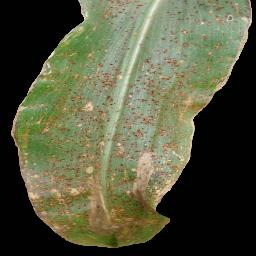

In [17]:
# Load random smaple of plant disease
random_sample = train_df.sample(n=1).iloc[0]
sample_image_path = random_sample['filepaths']
sample_image = load_img(sample_image_path)

# Convert the image into its numpy array representation
sample_array = img_to_array(sample_image)
print(f"Each image has shape: {sample_array.shape} ,dtype: {sample_array.dtype}, class of: {random_sample['labels']}")
sample_image

In [18]:
img_size= (224,224)
train_datagen = ImageDataGenerator(rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
train_generator = train_datagen.flow_from_dataframe(dataframe=train_df,
                                                    x_col='filepaths',
                                                    y_col='labels',
                                                    target_size=img_size,
                                                    batch_size=32,
                                                    color_mode='rgb',
                                                    class_mode='categorical',
                                                    seed=42,
                                                    shuffle=True)

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_dataframe(dataframe=test_df,
                                                    x_col='filepaths',
                                                    y_col='labels',
                                                    target_size=img_size,
                                                    batch_size=32,
                                                    color_mode='rgb',
                                                    class_mode='categorical',
                                                    shuffle=False)


Found 63268 validated image filenames belonging to 88 classes.
Found 7909 validated image filenames belonging to 88 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1137: UserWarning: Found 1 invalid image filename(s) in x_col="filepaths". These filename(s) will be ignored.
  warnings.warn(


In [19]:
def create_pre_trained_model():
  """
  Initializes an InceptionV3 model.

  Args:
    local_weights_file (string): path pointing to a pretrained weights H5 file

  Returns:
    pre_trained_model: the initialized InceptionV3 model
  """

  pre_trained_model = tf.keras.applications.InceptionV3(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet'
)



  # Make all the layers in the pre-trained model non-trainable
  for layer in pre_trained_model.layers:
    layer.trainable = False



  return pre_trained_model

In [20]:
pre_trained_model = create_pre_trained_model()

87910968/87910968 [==============================] - 0s 0us/step


In [21]:
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 111, 111, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 111, 111, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 111, 111, 32)         0         ['batch_normalizati

In [22]:
# Choose `mixed9` as the last layer of your base model
last_layer = pre_trained_model.get_layer('mixed9')
last_output = last_layer.output

In [23]:
x =tf.keras.layers.GlobalAveragePooling2D()(last_output)
x =tf.keras.layers.Dense(units=512, activation='relu')(x)
x =tf.keras.layers.Dropout(0.2)(x)
x =tf.keras.layers.Dense(units=256, activation='relu')(x)
x =tf.keras.layers.Dropout(0.2)(x)
x =tf.keras.layers.Dense(units=128, activation='relu')(x)
x =tf.keras.layers.Dense(units=88, activation='softmax')(x)

# Create the complete model by using the Model class
model = Model(inputs=pre_trained_model.input, outputs=x)

# Compile the model
model.compile(optimizer = 'adam',
              loss ='categorical_crossentropy',
              metrics = ['accuracy'])

In [24]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 111, 111, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 111, 111, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 111, 111, 32)         0         ['batch_normalization[0][0

In [25]:
history = model.fit(
    train_generator,
    steps_per_epoch=200,
    validation_data=test_generator,
    validation_steps=20,
    epochs=35,
    verbose=1
)

Epoch 1/35
200/200 [==============================] - 188s 882ms/step - loss: 2.2169 - accuracy: 0.4533 - val_loss: 1.2956 - val_accuracy: 0.6094
Epoch 2/35
200/200 [==============================] - 163s 812ms/step - loss: 1.1399 - accuracy: 0.6539 - val_loss: 0.8913 - val_accuracy: 0.7078
Epoch 3/35
200/200 [==============================] - 151s 757ms/step - loss: 0.9360 - accuracy: 0.7061 - val_loss: 0.8600 - val_accuracy: 0.7109
Epoch 4/35
200/200 [==============================] - 163s 815ms/step - loss: 0.8110 - accuracy: 0.7374 - val_loss: 0.6937 - val_accuracy: 0.7625
Epoch 5/35
200/200 [==============================] - 160s 802ms/step - loss: 0.7342 - accuracy: 0.7603 - val_loss: 0.7040 - val_accuracy: 0.7641
Epoch 6/35
200/200 [==============================] - 161s 807ms/step - loss: 0.7228 - accuracy: 0.7613 - val_loss: 0.6835 - val_accuracy: 0.7625
Epoch 7/35
200/200 [==============================] - 159s 793ms/step - loss: 0.6745 - accuracy: 0.7756 - val_loss: 0.5927 -

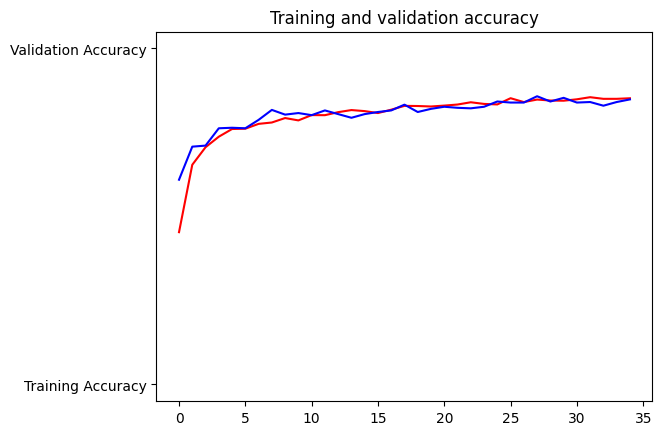

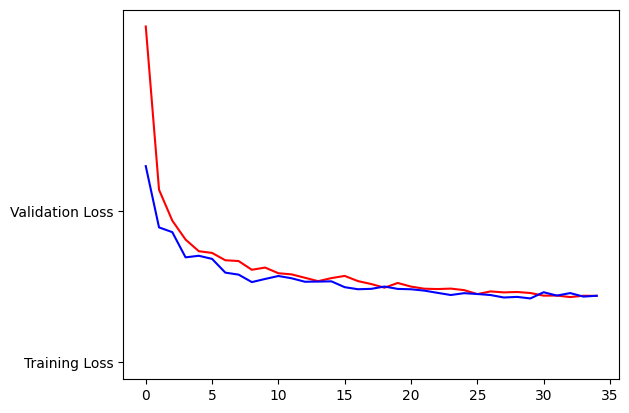

In [26]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.show()
print("")

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.show()

In [43]:
# Invert the classes dictionary
classes = {v: k for k, v in classes.items()}

correct_predictions = 0
incorrect_predictions = 0

# Testing model
for i in range(len(test_df)):
    # Load and preprocess the image
    image_path = test_df.iloc[i]['filepaths']
    image = load_img(image_path, target_size=(224, 224))
    image = img_to_array(image) / 255.0

    # True label
    true_label = test_df.iloc[i]['labels']
    true_label_index = classes[true_label]

    # Make a prediction
    prediction = model.predict(np.expand_dims(image, axis=0))[0]
    predicted_label_index = np.argmax(prediction)
    predicted_label = list(classes.keys())[list(classes.values()).index(predicted_label_index)]

    # Check if the prediction is correct
    if true_label_index == predicted_label_index:
        correct_predictions += 1
        print(f"True Label: {true_label}, Predicted Label: {predicted_label} - Correct Prediction")
    else:
        incorrect_predictions += 1
        print(f"True Label: {true_label}, Predicted Label: {predicted_label} - Incorrect Prediction")

# True/False total
print(f"Correct predictions: {correct_predictions}")
print(f"Incorrect predictions: {incorrect_predictions}")

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 59ms/step
True Label: Tomato__bacterial_spot, Predicted Label: Tomato__bacterial_spot - Correct Prediction
1/1 [==============================] - 0s 64ms/step
True Label: Tomato__yellow_leaf_curl_virus, Predicted Label: Tomato__yellow_leaf_curl_virus - Correct Prediction
1/1 [==============================] - 0s 37ms/step
True Label: Tea__red_leaf_spot, Predicted Label: Tea__red_leaf_spot - Correct Prediction
1/1 [==============================] - 0s 74ms/step
True Label: Apple__scab, Predicted Label: Potato__late_blight - Incorrect Prediction
1/1 [==============================] - 0s 35ms/step
True Label: Soybean__healthy, Predicted Label: Soybean__healthy - Correct Prediction
1/1 [==============================] - 0s 46ms/step
True Label: Soybean__caterpillar, Predicted Label: Soybean__caterpillar - Correct Prediction
1/1 [==============================] - 0s 42ms/step
True Label: Grape__blac

In [45]:
acc = (correct_predictions)/(correct_predictions+incorrect_predictions)
acc

0.8652168415728917

In [46]:
# Save the entire model
model.save("PlantPatrol_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [47]:
# Load the saved model
from tensorflow.keras.models import load_model
model = load_model("PlantPatrol_model.h5")

# Make sure the model was correct
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 111, 111, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 111, 111, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 111, 111, 32)         0         ['batch_normalization[0][0